## Challenge problem: Image segmentation of celebrity faces

In this project, I have developed a deep learning framework for image segmentation of celebrity faces.

### 1-Dataset

- The Large-scale CelebFaces Attributes (CelebA) dataset in http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html is used to train and test the model. 


- A dataset with 1400 images is used where the training dataset has 1000 images, the development dataset has 200 images, and the test dataset has 200 images.


- The original CelebA images are rescaled to 256x256x3 for inputs and 256x256 (no channel) for outputs. The greyscale pixels of output are further classified into background class (if pixel<=128 then class=0) and face class (if pixel>128 then class=1).

### 2-Packages

- The following packages are needed for training and inference.

In [1]:
from SegNet import SegNet
from drawings_object import display_color_legend
import imageio

### 3-Training

- To develop  the model, I used the implementation of SegNet neural network in http://github.com/toimcio/SegNet-tensorflow -- the SegNet was proposed in http://arxiv.org/abs/1511.00561 and http://arxiv.org/abs/1511.02680 for segmentation of objects in an image. 


- The paths for the train/dev/test dataset and the model are set in the "config_train_ADAM.json" file.


- For optimization, adaptive learning rate optimization (ADAM) algorithm with learning rate 0.001 is used.


- To run the code, Python 3.6.5 and Tensorflow 1.13.1 are used on a CPU machine. 


- Performance results: accuracy = 0.990128, mean IU  = 0.977189, class # 0 accuracy = 0.995174, class # 1 accuracy = 0.978935

In [4]:
# Set the number of epochs
numEpochs = 10000

# Set the batch size
batchSize = 1

# Call the SegNet class
S=SegNet("config_train_ADAM.json")

# Train the SegNet model
S.train(numEpochs, batchSize)

# Save the SegNet model
S.save()

VGG parameter loaded
Filling queue with 300 input images before starting to train. This may take some time.
generating image and label batch:
Filling queue with 300 input images before starting to train. This may take some time.
generating image and label batch:
Running with Adam Optimizer with learning rate: 0.001
Epoch 0: Train Loss 0.808, Train Accu  0.463
accuracy = 0.614120
mean IU  = 0.440621
    class # 0 accuracy = 0.544922 
    class # 1 accuracy = 0.741847 
per_class accuracy by logits in training time None
start validating.......
accuracy = 0.526759
mean IU  = 0.354080
    class # 0 accuracy = 0.452694 
    class # 1 accuracy = 0.700463 
Epoch 0: Train Loss  0.808, Train Acc  0.463, Val Loss  0.768, Val Acc  0.527
Epoch 1: Train Loss 0.778, Train Accu  0.516
Epoch 2: Train Loss 0.621, Train Accu  0.761
Epoch 3: Train Loss 0.469, Train Accu  0.894
Epoch 4: Train Loss 0.414, Train Accu  0.888
Epoch 5: Train Loss 0.370, Train Accu  0.883
Epoch 6: Train Loss 0.402, Train Accu  0

accuracy = 0.971721
mean IU  = 0.936778
    class # 0 accuracy = 0.990018 
    class # 1 accuracy = 0.933193 
Epoch 3000: Train Loss  0.142, Train Acc  0.940, Val Loss  0.077, Val Acc  0.972
Epoch 3100: Train Loss 0.057, Train Accu  0.976
accuracy = 0.974014
mean IU  = 0.943808
    class # 0 accuracy = 0.987123 
    class # 1 accuracy = 0.948961 
per_class accuracy by logits in training time None
Epoch 3200: Train Loss 0.061, Train Accu  0.978
accuracy = 0.978943
mean IU  = 0.955573
    class # 0 accuracy = 0.986820 
    class # 1 accuracy = 0.965271 
per_class accuracy by logits in training time None
Epoch 3300: Train Loss 0.106, Train Accu  0.956
accuracy = 0.955811
mean IU  = 0.897376
    class # 0 accuracy = 0.940842 
    class # 1 accuracy = 0.998473 
per_class accuracy by logits in training time None
Epoch 3400: Train Loss 0.043, Train Accu  0.984
accuracy = 0.984818
mean IU  = 0.966621
    class # 0 accuracy = 0.988959 
    class # 1 accuracy = 0.976658 
per_class accuracy by lo

accuracy = 0.980148
mean IU  = 0.951456
    class # 0 accuracy = 0.994687 
    class # 1 accuracy = 0.942610 
per_class accuracy by logits in training time None
Epoch 6700: Train Loss 0.037, Train Accu  0.983
accuracy = 0.982788
mean IU  = 0.961168
    class # 0 accuracy = 0.995603 
    class # 1 accuracy = 0.955966 
per_class accuracy by logits in training time None
Epoch 6800: Train Loss 0.034, Train Accu  0.986
accuracy = 0.986893
mean IU  = 0.968805
    class # 0 accuracy = 0.999262 
    class # 1 accuracy = 0.957594 
per_class accuracy by logits in training time None
Epoch 6900: Train Loss 0.110, Train Accu  0.962
accuracy = 0.966476
mean IU  = 0.914141
    class # 0 accuracy = 0.963328 
    class # 1 accuracy = 0.976832 
per_class accuracy by logits in training time None
Epoch 7000: Train Loss 0.041, Train Accu  0.984
accuracy = 0.984238
mean IU  = 0.965933
    class # 0 accuracy = 0.986251 
    class # 1 accuracy = 0.980455 
per_class accuracy by logits in training time None
sta

### 4-Inference

- In this section, the trained model is used to segment a face from background in an image. 


- The cell in 4.1 predicts the faces from training dataset. 


- The cell in 4.2 uses the model to predict from new datasets such as test dataset.


- The model uncertainties are calculated based on Bayesian SegNet in http://arxiv.org/abs/1511.02680.

#### 4.1-Training dataset

VGG parameter loaded
INFO:tensorflow:Restoring parameters from /Users/hosseinhonarvar/Documents/Job_Postdoc/Pending/FellowshipAI/Segmentation/CelebA/Face/1000Tr200Va200Te/ModelADAM/model.ckpt-0
1000 images are loaded


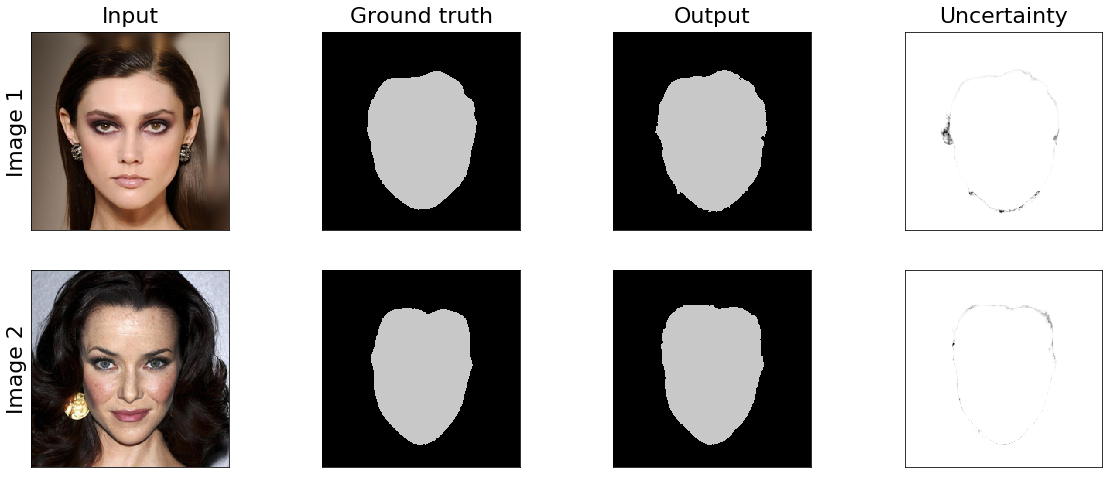

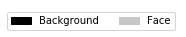

In [14]:
# Set the image label (currently from 1000 images in training dataset with labels 0:999))
imgLbl = [50, 778]

# Call the SegNet class
S=SegNet("config_inference.json")

# Infer from the SegNet model 
S.visual_results('TRAIN', imgLbl, False)

# Plot the inference result 
display_color_legend()

#### 4.2-New dataset

VGG parameter loaded
INFO:tensorflow:Restoring parameters from /Users/hosseinhonarvar/Documents/Job_Postdoc/Pending/FellowshipAI/Segmentation/CelebA/Face/1000Tr200Va200Te/ModelADAM/model.ckpt-0


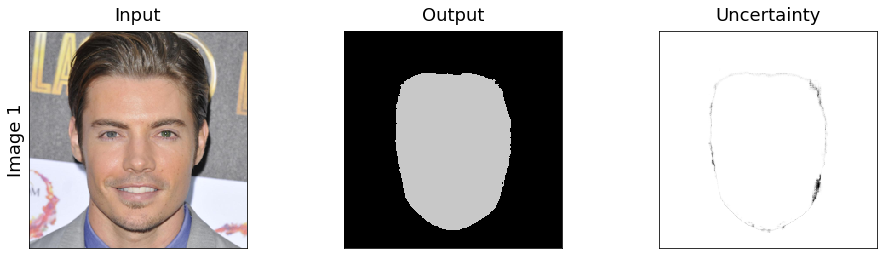

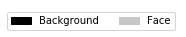

Inference time for Image 1: 41.56 seconds


In [18]:
# Set the image label (currently from 200 images in test dataset with labels 1199:1399)
imgLbl = 1298 

# The inference dataset directory
dir = './Face/1000Tr200Va200Te/Test200/X/'
images = [imageio.imread(dir+str(imgLbl)+'.png')]

# Call the SegNet class
S=SegNet("config_inference.json")

# Infer from the SegNet model 
pred_tot, var_tot, inference_time = S.visual_results_external_image(images)

# Plot the inference result 
display_color_legend()

# Print the inference time
for t in range(len(inference_time)):
    print("Inference time for Image %d: %.2f seconds" % (t+1, inference_time[t]))